<a href="https://colab.research.google.com/github/mibeaum/ML/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series classification**



Load Python modules

In [118]:
import numpy as np  # Arrays, matrices and functions on them. Required by Pandas, below
import pandas as pd # A data analysis library
from sklearn.model_selection import train_test_split # scikit-learn, machine learning tools
import matplotlib.pyplot as plt # A plotting library
import seaborn as sns # Built on matplotlib, facilitates aesthetically pleasing plots
import datetime

# General settings
sns.set_style('whitegrid') # Plots will have a white grid
# Variables that will help us work with the classes
class_names = ['workstation', 'server']
class_colors = ['darkorange', 'steelblue']

Functions

In [173]:
def load_data(filename):
    ''' Load the data from a file in a GitHub repo '''
    url_root = 'https://raw.githubusercontent.com/mibeaum/ML/master'
    url = url_root+'/'+filename
    mydateparser = lambda x: ( 
       # pd.to_datetime(x, format="%d/%m/%Y%H:%M:%S").strftime("%H%M%S")
       pd.to_datetime(x, format="%d/%m/%Y%H:%M:%S").time
    )    
    df = pd.read_csv(url, sep=',', header=0, usecols = ["server", "dateTime"], parse_dates=['dateTime'], date_parser=mydateparser) # Use Pandas to load the data into a Pandas DataFrame
    print('Loaded from', url)
    data = df.values # Convert from a Pandas DataFrame to a numpy array
    print('The shape of data is', data.shape)
    print('')
    return df

def plot_data_samples(df, labels):
    ''' Plot the time series data relating to the input list of sample numbers '''
    my_day = datetime.date(1970, 11, 7)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in df['dateTime'] ]
    plt.scatter(x_dt, df['server'])

    xlabels = ['{%H:%M:%S}'.format(x) for x in plt.xticks()]
    plt.set_xticklabels(xlabels)

    print('')
    #plt.set ylim([00.00, 23.59])
    plt.title('workstation (class 0): server (class 1)')
    plt.ylabel('Server')
    plt.xlabel('Time')    

Load the data

In [174]:
filename = 'data.csv'
df = load_data(filename) 
data_log = df.values # Convert from a Pandas DataFrame to a numpy array
print('The data is a matrix. These are the first 7 rows of data:\n', data_log[0:7], '\n')

Loaded from https://raw.githubusercontent.com/mibeaum/ML/master/data.csv
The shape of data is (42, 2)

The data is a matrix. These are the first 7 rows of data:
 [[0 datetime.time(8, 11, 10)]
 [0 datetime.time(9, 23, 2)]
 [1 datetime.time(19, 30, 22)]
 [1 datetime.time(20, 3, 23)]
 [0 datetime.time(10, 19, 31)]
 [0 datetime.time(11, 23, 21)]
 [0 datetime.time(11, 30, 12)]] 



Process the data

In [175]:
labels = data_log[:,0].astype(int)
data = data_log[:,1:]
print('The shape of the data matrix is', data.shape)
print('The shape of the labels vector is', labels.shape)

The shape of the data matrix is (42, 1)
The shape of the labels vector is (42,)


Plot the data

KeyError: ignored

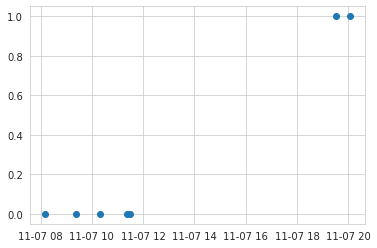

In [176]:
plot_data_samples(df[0:7], labels) 